In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Crime_Incidents_4271237485119492148.csv')
print(data.head())

C:\Users\gresn\AppData\Local\Temp\ipykernel_31132\353160197.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Crime_Incidents_4271237485119492148.csv')


   OBJECTID       PrimaryKey     CaseNumber    District  \
0         1  201600000036001  2016-00000036  District 3   
1         2  201600000112001  2016-00000112  District O   
2         3  201600000128003  2016-00000128  District 5   
3         4  201600000265001  2016-00000265  District O   
4         5  201600000268003  2016-00000268  District 3   

                 UCRdesc  OffenseYear TimeGroup         ReportedDate  \
0                Weapons         2016     Older  1/1/2016 5:10:00 AM   
1                Assault         2016     Older  1/1/2016 5:51:00 AM   
2  Drug Abuse Violations         2016     Older  1/1/2016 5:58:00 AM   
3              Vandalism         2016     Older  1/1/2016 7:30:00 AM   
4                Weapons         2016     Older  1/1/2016 7:32:13 AM   

   OffenseMonth  OffenseDay  ...          CENSUS_TRACT CENSUS_TRACT_GEOID  \
0             1           1  ...     Census Tract 1122        39035112200   
1             1           1  ...     Census Tract 1238    

In [27]:
# just 2025 data
data25 = data[data['OffenseYear'] == 2025]

# inside CWRU coordinate box
min_lat = 41.498901
max_lat = 41.515741
min_lon = -81.615495
max_lon = -81.597317

filtered_df = data25[
    (data25['LAT'] >= min_lat) &
    (data25['LAT'] <= max_lat) &
    (data25['LON'] >= min_lon) &
    (data25['LON'] <= max_lon)
]

cwru_offenses_per_month = (
    filtered_df['OffenseMonth']
    .value_counts()
    .sort_index()
    .rename_axis('Month')
    .reset_index(name='OffenseCount')
)

print(cwru_offenses_per_month)

    Month  OffenseCount
0       1            66
1       2            53
2       3            71
3       4            82
4       5            97
5       6            85
6       7            62
7       8            74
8       9            48
9      10            65
10     11             7


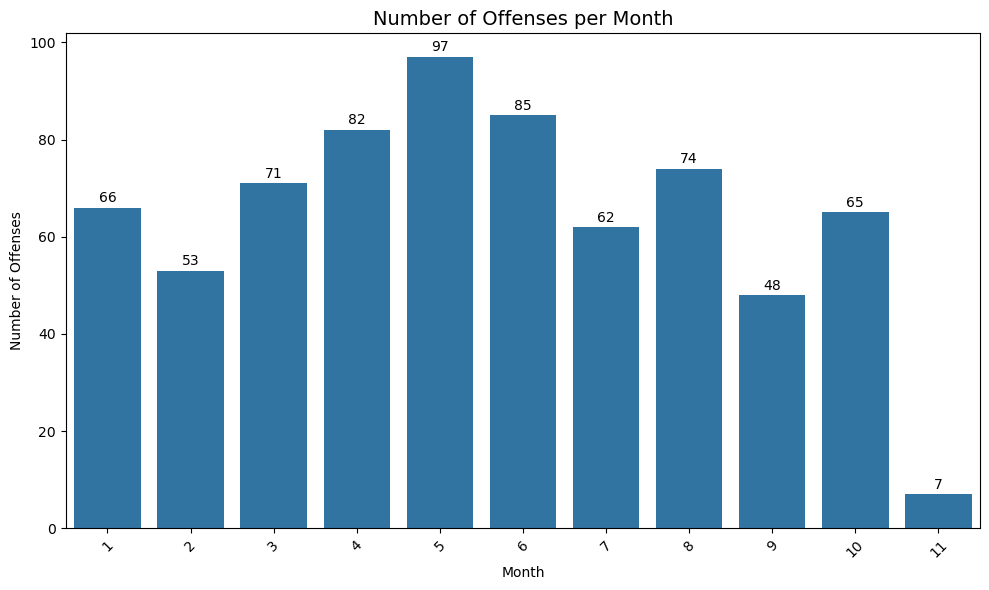

In [28]:
#Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=offenses_per_month,
    x='Month', y='OffenseCount',
)

#value labels above bars
for i, value in enumerate(offenses_per_month['OffenseCount']):
    ax.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

plt.title('Number of Offenses per Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Offenses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

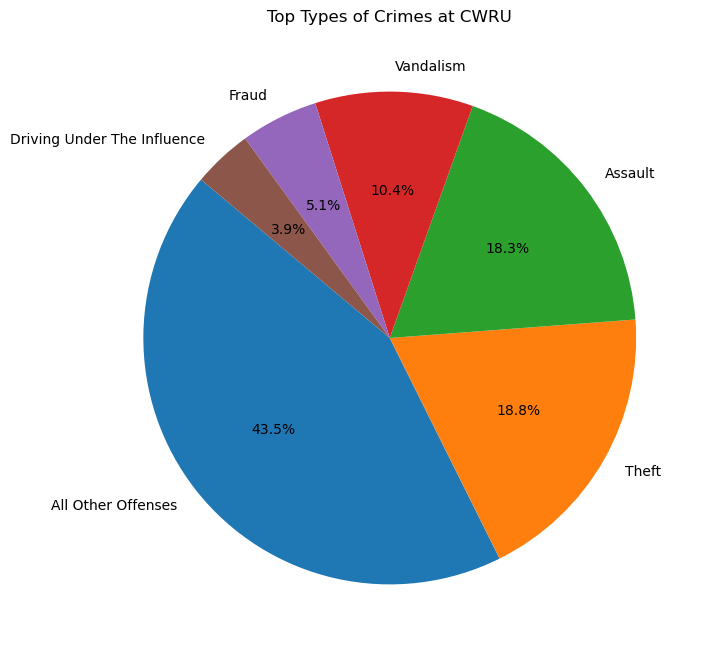

In [35]:
# Types of crimes at CWRU
top6 = filtered_df['UCRdesc'].value_counts().nlargest(6)

# Compute percentages
percentages = top6 / top6.sum() * 100

# Create pie chart
plt.figure(figsize=(8,8))
plt.pie(percentages, labels=top6.index, autopct='%1.1f%%', startangle=140)
plt.title('Top Types of Crimes at CWRU')
plt.show()

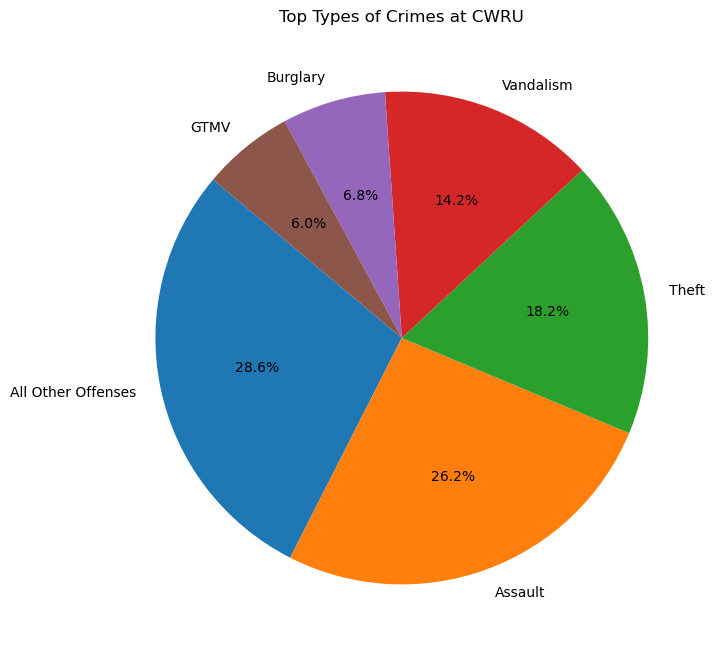

In [36]:
# Types of crimes in cle
top6 = data['UCRdesc'].value_counts().nlargest(6)

# Compute percentages
percentages = top6 / top6.sum() * 100

# Create pie chart
plt.figure(figsize=(8,8))
plt.pie(percentages, labels=top6.index, autopct='%1.1f%%', startangle=140)
plt.title('Top Types of Crimes at CWRU')
plt.show()